# Solving the n-Queens Problem using Local Search

## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Caclulate the number of conflicts, i.e., the objective function."""

    n = len(board)
    
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n
    
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1
    
    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))


def show_board(board, cols = ['white', 'gray'], fontsize = 48):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


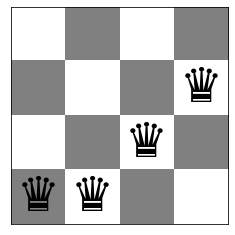

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [2]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


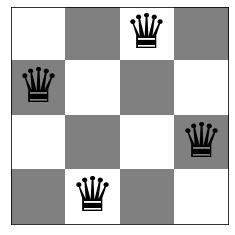

In [3]:
board = [1,3,0,2]
show_board(board)

## Steepest-ascend Hill Climbing Search

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum. 

Start Steepest-ascend Hill Climbing Search:
start board is: [3 6 5 4 4 0 1]
start conflict is: 9
Board with 9 conflicts.


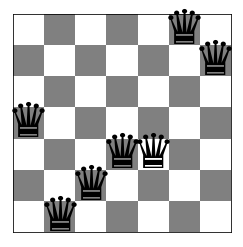

current board is: [3 6 0 4 4 0 1]
current conflict is: 6
Board with 6 conflicts.


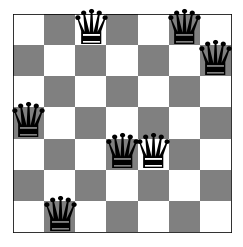

current board is: [3 6 0 4 4 0 5]
current conflict is: 3
Board with 3 conflicts.


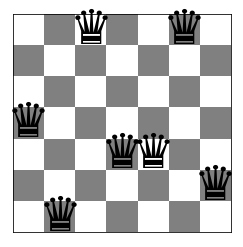

current board is: [3 6 0 1 4 0 5]
current conflict is: 2
Board with 2 conflicts.


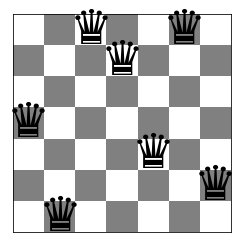

current board is: [3 6 4 1 4 0 5]
current conflict is: 1
Board with 1 conflicts.


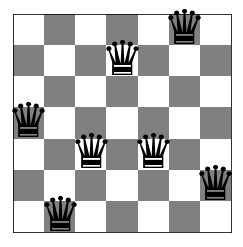

End Steepest-ascend Hill Climbing Search


The final board with (local) optimum:
Board with 1 conflicts.


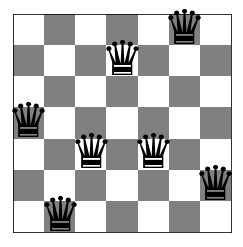

In [2]:
from operator import itemgetter

def show_all_processes(all_boards, all_conflicts, search_name):
    """
    show the total changed conflict processes
    :param all_boards: all the boards
    :param all_conflicts: All boards corresponding to the conflicts
    :param search_name: search name
    """
    print(f"Start {search_name} Search:")
    for i in range(len(all_boards)):
        if i == 0:
            print(f"start board is: {all_boards[i]}")
            print(f"start conflict is: {all_conflicts[i]}")
            show_board(all_boards[i])
        else:
            print(f"current board is: {all_boards[i]}")
            print(f"current conflict is: {all_conflicts[i]}")
            show_board(all_boards[i])
    print(f"End {search_name} Search")

def initialized_board(size):
    # initialize
    # initialize board
    board = random_board(size)
    initialized_conflict = conflicts(board)
    # all the boards and conflicts in total processes
    all_boards = []
    all_conflicts = []
    # add initialized board and conflict
    all_boards.append(board)
    all_conflicts.append(initialized_conflict)

    current_board = board.copy()
    current_conflict = initialized_conflict

    return (current_board, current_conflict, all_boards, all_conflicts)

def steepest_ascend(size):
    """
    Steepest-ascend Hill Climbing Search algorithm
    :param size: the n-Queens game length of side
    :return: the final conflict and board (local optimum or optimal solution)
    """
    # initialize
    current_board, current_conflict, all_boards, all_conflicts = initialized_board(size)

    # update
    # every conflict change
    while True:
        new_boards_conflicts = neighbors_conflicts_steepest_ascend(current_board)
        # Calculate the smallest conflict in new_boards_conflicts
        new_min_boards_conflict = min(new_boards_conflicts, key = itemgetter(0))
        if new_min_boards_conflict[0] < current_conflict:
            current_conflict = new_min_boards_conflict[0]
            current_board = new_min_boards_conflict[1]
            all_boards.append(current_board.copy())
            all_conflicts.append(current_conflict)
        else:
            break
    # the final board and conflict (local optimum or optimal solution)
    best_conflict = all_conflicts[-1]
    best_board = all_boards[-1]

    return (best_board, best_conflict, all_boards, all_conflicts)

def neighbors_conflicts_steepest_ascend(board):
    """
    calculate min conflict in every column with current state
    :param board: the current board
    :return: all the min conflict in every col (list)
    """
    neighbors_boards_conflicts = []
    for i in range(len(board)):
        current_column = []
        for j in range(len(board)):
            if board[i] == j:
                pass
            else:
                current_board = board.copy()
                current_board[i] = j
                current_conflict = conflicts(current_board)
                current_column.append((current_conflict, current_board))
        neighbors_boards_conflicts.append(min(current_column.copy(), key=itemgetter(0)))

    return neighbors_boards_conflicts

if __name__ == '__main__':
    result = steepest_ascend(size=7)
    show_all_processes(result[2], result[3], "Steepest-ascend Hill Climbing")
    print("\n\nThe final board with (local) optimum:")
    show_board(result[0])

#### Description:

Based on the description of Steepest-ascend Hill Climbing Search in the textbook, we can tell that the algorithm's logic is:

Step 1. Keep the other columns unchanged, move the current column up and down to all the other rows of the column and record the board and conflict values after each move. Calculate the board corresponding to the smallest conflict value in all rows of the current column and store both of them (conflict, board) in neighbors_boards_conflicts list.

Step 2. Repeat step 1 to calculate the minimum conflict value and board corresponding to each column and store these conflicts and boards in neighbors_boards_conflicts list.

Step 3. Calculate the minimum conflict value in neighbors_boards_conflicts and compare it with the current conflict value. If the current conflict value is large, replace the current conflict value with the smallest calculated conflict value and take the board corresponding to the new conflict value as the current board to step 1 for looping; If the current conflict value is small, skip to step 4. 

Step 4. If the conflict value is equal to 0, then it is an optimal solution; If the conflict value is not equal to 0, then it is a local optimum.

## Stochastic Hill Climbing 1

Chooses randomly from among all uphill moves till you have reached a local optimum.

Start Stochastic Hill Climbing 1 Search:
start board is: [1 1 2 6 3 6 4]
start conflict is: 4
Board with 4 conflicts.


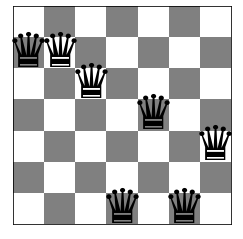

current board is: [1 1 2 0 3 6 4]
current conflict is: 3
Board with 3 conflicts.


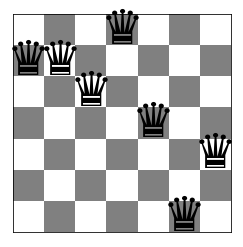

current board is: [1 4 2 0 3 6 4]
current conflict is: 2
Board with 2 conflicts.


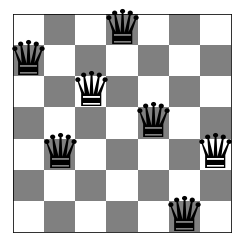

current board is: [1 5 2 0 3 6 4]
current conflict is: 1
Board with 1 conflicts.


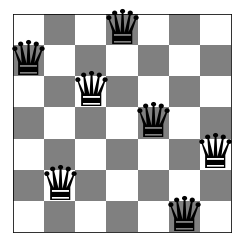

End Stochastic Hill Climbing 1 Search


The final board with (local) optimum:
Board with 1 conflicts.


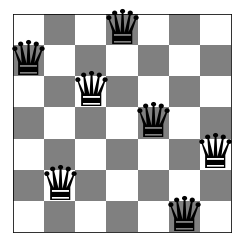

In [3]:
import random

def stochastic_hill_climbing_1(size):
    """
    Stochastic Hill Climbing 1 algorithm
    :param size: the n-Queens game length of side
    :return: the final conflict and board (local optimum or optimal solution)
    """
    # initialize
    current_board, current_conflict, all_boards, all_conflicts = initialized_board(size)

    # update
    # every conflict change
    while True:
        new_boards_conflicts = neighbors_conflicts_stochastic_1(current_board, current_conflict)
        if len(new_boards_conflicts) == 0:
            # have reached a (local) optimum
            break
        else:
            random_new_board_conflict = random.choice(new_boards_conflicts)
            current_conflict = random_new_board_conflict[0]
            current_board = random_new_board_conflict[1]
            all_boards.append(current_board.copy())
            all_conflicts.append(current_conflict)

    # the final board and conflict (local optimum or optimal solution)
    best_conflict = all_conflicts[-1]
    best_board = all_boards[-1]

    return (best_board, best_conflict, all_boards, all_conflicts)

def neighbors_conflicts_stochastic_1(board, conflict):
    """
    calculate all the conflicts that are less than parameter conflict
    :param board: the current board
    :param conflict: the current conflict
    :return: all the conflicts that are less than parameter conflict (list)
    """
    neighbors_boards_conflicts = []
    for i in range(len(board)):
        for j in range(len(board)):
            if board[i] == j:
                pass
            else:
                current_board = board.copy()
                current_board[i] = j
                current_conflict = conflicts(current_board)
                if current_conflict < conflict:
                    neighbors_boards_conflicts.append((current_conflict, current_board.copy()))

    return neighbors_boards_conflicts

if __name__ == '__main__':
    result = stochastic_hill_climbing_1(size=7)
    show_all_processes(result[2], result[3], "Stochastic Hill Climbing 1")
    print("\n\nThe final board with (local) optimum:")
    show_board(result[0])

#### Description:

Based on the description of Stochastic Hill Climbing 1 in the textbook, we can tell that the algorithm's logic is:

Step 1. Calculate the conflict value of all rows in each column except the row where the original board is located, and store all boards and conflicts that are smaller than the current conflict value in the neighbors_boards_conflicts list. If there is data in the neighbors_boards_conflicts list, skip to Step 2. If there is no data in the neighbors_boards_conflicts list, skip to Step 3.

Step 2. Randomly select one (board, conflict) in the list of neighbors_boards_conflicts to replace the current (board, conflict).

Step 3. If the conflict value is equal to 0, then it is an optimal solution; If the conflict value is not equal to 0, then it is a local optimum.

## Stochastic Hill Climbing 2

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__ 

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

Start Stochastic Hill Climbing 2 Search:
start board is: [4 2 6 2 0 0 4]
start conflict is: 6
Board with 6 conflicts.


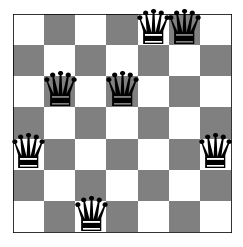

current board is: [4 2 6 2 0 1 4]
current conflict is: 5
Board with 5 conflicts.


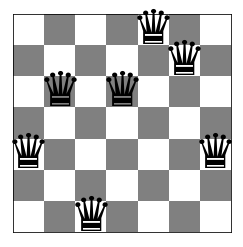

current board is: [1 2 6 2 0 1 4]
current conflict is: 4
Board with 4 conflicts.


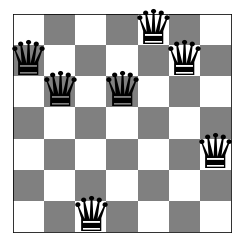

current board is: [1 2 6 2 0 5 4]
current conflict is: 3
Board with 3 conflicts.


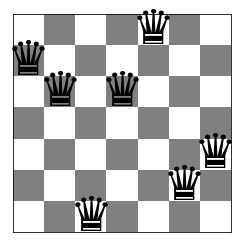

current board is: [1 6 6 2 0 5 4]
current conflict is: 2
Board with 2 conflicts.


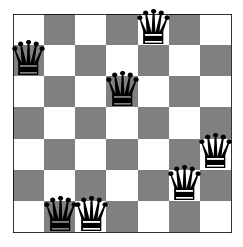

current board is: [1 6 6 2 0 5 3]
current conflict is: 1
Board with 1 conflicts.


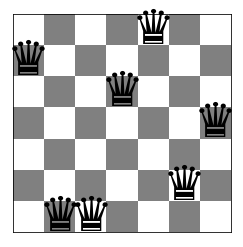

current board is: [1 6 4 2 0 5 3]
current conflict is: 0
Board with 0 conflicts.


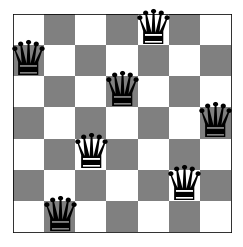

End Stochastic Hill Climbing 2 Search


The final board with local optimum:
Board with 0 conflicts.


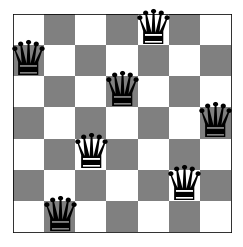

In [4]:
def stochastic_hill_climbing_2(size, max_search_number):
    """
    Stochastic Hill Climbing 2 algorithm
    :param size: the n-Queens game length of side
    :param max_search_number: maximum number of searches when iterative conflict is always the same
    :return: the final conflict and board (local optimum or optimal solution),
             and whether current search number is more than max search numbers
    """
    # initialize
    current_board, current_conflict, all_boards, all_conflicts = initialized_board(size)

    # initialize current search number
    current_search_number = 0
    max_setting_cost = False

    # update
    # every conflict change
    while True:
        if current_search_number > max_search_number or current_conflict == 0:
            break
        else:
            new_board_conflict = neighbors_conflicts_stochastic_2(current_board)
            if new_board_conflict[0] < current_conflict:
                current_conflict = new_board_conflict[0]
                current_board = new_board_conflict[1]
                all_boards.append(current_board.copy())
                all_conflicts.append(current_conflict)
                #if new conflict < current conflict, reset current search number = 0
                current_search_number = 0
            else:
                #if new conflict >= current conflict, current search number += 1
                current_search_number += 1

    # whether current search number is more than max search numbers. If yes, set True
    if current_search_number > max_search_number:
        max_setting_cost = True

    # the final board and conflict (local optimum or optimal solution)
    best_conflict = all_conflicts[-1]
    best_board = all_boards[-1]

    return (best_board, best_conflict, all_boards, all_conflicts, max_setting_cost)

def neighbors_conflicts_stochastic_2(board):
    """
    randomize a different board
    :param board: the current board
    :return: randomized board (only one queen is changed in the board) and corresponding conflict
    """
    board_size = len(board)
    current_board = board.copy()
    i = np.random.randint(0, board_size)
    j = np.random.randint(0, board_size)
    while current_board[i] == j:
        j = np.random.randint(0, board_size)
    current_board[i] = j
    conflict = conflicts(current_board)
    return (conflict, current_board)

if __name__ == '__main__':
    result = stochastic_hill_climbing_2(size=7, max_search_number=1000)
    show_all_processes(result[2], result[3], "Stochastic Hill Climbing 2")
    if result[4]:
        print("\n\nhave reached max search numbers, and conflict does not reach 0")
    print("\n\nThe final board with local optimum:")
    show_board(result[0])

#### Description:

Based on the description of Stochastic Hill Climbing 2 in the textbook, we can tell that the algorithm's logic is:

Step 1. Randomly select a board that is different from the current board. (change only one Queen) (this Queen only moves in the column it is in)

Step 2. If the conflict value of the new board is less than the current conflict value, replace the current (conflict, board) with the new (conflict, board) and set the current_search_number value to 0. If the conflict value of the new board is greater than or equal to the current conflict value, keep the current (conflict, board), and add 1 to the current_search_number value.

Step 3. If the current_search_number value is less than or equal to max_search_numbers, skip to Step 1. if the current_search_number value is greater than max_search_numbers or the current conflict value is equal to 0, skip to Step 4.

Step 4. If the conflict value is equal to 0, then it is an optimal solution; If the conflict value is not equal to 0, then it is a local optimum.

## Hill Climbing Search with Random Restarts

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algoithm several times starting with a new random board.

Start Hill Climbing Search with Random Restarts Search:
start board is: [6 1 3 5 5 0 4]
start conflict is: 3
Board with 3 conflicts.


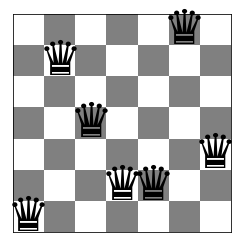

current board is: [1 2 5 5 0 4 6]
current conflict is: 2
Board with 2 conflicts.


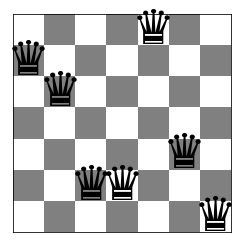

current board is: [5 3 1 6 4 2 0]
current conflict is: 0
Board with 0 conflicts.


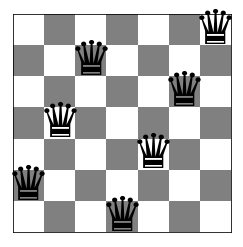

End Hill Climbing Search with Random Restarts Search


The final board with (local) optimum:
Board with 0 conflicts.


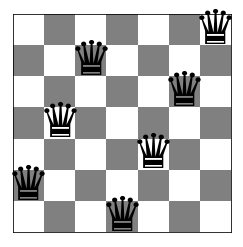

In [5]:
def hill_climbing_with_random_restarts(size, restart_number, max_search_number):
    """
    Hill Climbing Search with Random Restarts algorithm
    :param size: the n-Queens game length of side
    :param restart_number: restart number
    :param max_search_number: maximum number of searches when iterative conflict is always the same
    :return: the final conflict and board (local optimum or optimal solution)
    """
    # initialize
    current_board, current_conflict, all_boards, all_conflicts = initialized_board(size)

    new_board_conflict = []

    # update
    for i in range(3):
        for j in range(restart_number):
            if i == 0:
                new_board_conflict = steepest_ascend(size)
            elif i == 1:
                new_board_conflict = stochastic_hill_climbing_1(size)
            elif i == 2:
                new_board_conflict = stochastic_hill_climbing_2(size, max_search_number)

            if new_board_conflict[1] == 0:
                all_boards.append(new_board_conflict[0])
                all_conflicts.append(new_board_conflict[1])
                # the final board and conflict (local optimum or optimal solution)
                best_conflict = all_conflicts[-1]
                best_board = all_boards[-1]
                return (best_board, best_conflict, all_boards, all_conflicts)
            elif new_board_conflict[1] < current_conflict:
                current_conflict = new_board_conflict[1]
                current_board = new_board_conflict[0]
                all_boards.append(current_board.copy())
                all_conflicts.append(current_conflict)

    # the final board and conflict (local optimum or optimal solution)
    best_conflict = all_conflicts[-1]
    best_board = all_boards[-1]

    return (best_board, best_conflict, all_boards, all_conflicts)

if __name__ == '__main__':
    result = hill_climbing_with_random_restarts(size=7, restart_number=100, max_search_number=1000)
    show_all_processes(result[2], result[3], "Hill Climbing Search with Random Restarts")
    print("\n\nThe final board with (local) optimum:")
    show_board(result[0])

#### Description:

Based on the description of Hill Climbing Search with Random Restarts in the textbook, we can tell that the algorithm's logic is:

Step 1. Run the Steepest-ascend Hill Climbing Search algorithm to get the new (conflict, board). If the new conflict is smaller than the current conflict, then the new (conflict, board) replaces the current (conflict, board). If the new conflict is greater than or equal to the current conflict, the current (conflict, board) is kept.

Step 2. restart_numbers += 1. If the current conflict is equal to 0, skip to Step 10. If the current conflict is not equal to 0, skip to Step 3. 

Step 3. If restart_numbers is greater than or equal to the set value, skip to Step 4. if restart_numbers is less than the set value, skip to Step 1.

Step 4. Run Stochastic Hill Climbing 1 algorithm to get the new (conflict, board). If the new conflict is smaller than the current conflict, then the new (conflict, board) replaces the current (conflict, board). If the new conflict is greater than or equal to the current conflict, the current (conflict, board) is kept.

Step 5. restart_numbers += 1. If the current conflict is equal to 0, skip to Step 10. If the current conflict is not equal to 0, skip to Step 6.

Step 6. If restart_numbers is greater than or equal to the set value, skip to Step 7. if restart_numbers is less than the set value, skip to Step 4.

Step 7. Run the Stochastic Hill Climbing 2 algorithm to get the new (conflict, board). If the new conflict is smaller than the current conflict, then the new (conflict, board) replaces the current (conflict, board). If the new conflict is greater than or equal to the current conflict, the current (conflict, board) is kept.

Step 8. restart_numbers += 1. If the current conflict is equal to 0, skip to Step 10. If the current conflict is not equal to 0, skip to Step 9.

Step 9. If restart_numbers is greater than or equal to the set value, skip to Step 10. if restart_numbers is less than the set value, skip to Step 7.

Step 10. If the conflict value is equal to 0, then it is an optimal solution; If the conflict value is not equal to 0, then it is a local optimum.

## Compare Performance

Use runtime and objective function value to compare the algorithms. 

* Use boards of different sizes to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 10 times) with different starting boards and report averages.

* How do the algorithms scale with problem size? Use tables and charts.

* What is the largest board each algorithm can solve in a reasonable amount time?

See [Profiling Python Code](../Python_Code_Examples/profiling_code.ipynb) for help about how to measure runtime in Python.

                              algorithm name       5*5     10*10     15*15  \
0       Steepest-ascend Hill Climbing Search  0.000623  0.007086  0.028291   
1                 Stochastic Hill Climbing 1  0.000501  0.010630  0.043159   
2                 Stochastic Hill Climbing 2  0.004461  0.021524  0.025010   
3  Hill Climbing Search with Random Restarts  0.000698  0.074052  1.123102   

      20*20      25*25  
0  0.103681   0.214074  
1  0.150070   0.388524  
2  0.053998   0.074440  
3  7.312092  22.888745  
                              algorithm name  5*5  10*10  15*15  20*20  25*25
0       Steepest-ascend Hill Climbing Search  0.0    1.9    2.4    2.0    2.3
1                 Stochastic Hill Climbing 1  0.6    1.4    2.2    2.9    2.9
2                 Stochastic Hill Climbing 2  0.3    2.2    1.5    2.4    2.9
3  Hill Climbing Search with Random Restarts  0.0    0.0    0.0    0.0    0.1


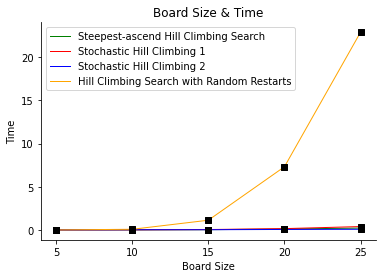

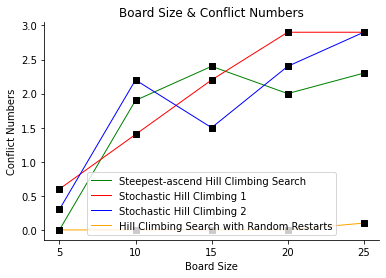

In [6]:
import pandas as pd
import time

def chart(name_list, result):
    name_list = pd.Series(name_list)
    board_1 = pd.Series(result[0])
    board_2 = pd.Series(result[1])
    board_3 = pd.Series(result[2])
    board_4 = pd.Series(result[3])
    board_5 = pd.Series(result[4])
    data = [name_list, board_1, board_2, board_3, board_4, board_5]
    pd.DataFrame(data)

    d = {'algorithm name': pd.Series(name_list),
         '5*5': pd.Series(board_1),
         '10*10': pd.Series(board_2),
         '15*15': pd.Series(board_3),
         '20*20': pd.Series(board_4),
         '25*25': pd.Series(board_5)
         }

    dataframe = pd.DataFrame(d)
    print(dataframe)

def graph(board_size_list, result, graph_name):
    if graph_name == "Time":
        plt.figure("Board Size & Time")
    elif graph_name == "Conflict Numbers":
        plt.figure("Board Size & Conflict Numbers")
    plt.plot(board_size_list, result[0], \
             label="Steepest-ascend Hill Climbing Search", color="green", linewidth=1)
    plt.plot(board_size_list, result[1], \
             label="Stochastic Hill Climbing 1", color="red", linewidth=1)
    plt.plot(board_size_list, result[2], \
             label="Stochastic Hill Climbing 2", color="blue", linewidth=1)
    plt.plot(board_size_list, result[3], \
             label="Hill Climbing Search with Random Restarts", color="orange",linewidth=1)

    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')

    plt.xticks(board_size_list)
    plt.xlabel("Board Size")
    if graph_name == "Time":
        plt.ylabel("Time")
    elif graph_name == "Conflict Numbers":
        plt.ylabel("Conflict Numbers")

    y_data = [result[0], result[1], result[2], result[3]]
    Y_axis = []
    for i in y_data:
        for j in i:
            Y_axis.append(j)
    x_data = [board_size_list, board_size_list, board_size_list, board_size_list]
    X_axis = []
    for i in x_data:
        for j in i:
            X_axis.append(j)
    plt.scatter(X_axis, Y_axis, marker="s", s=40, facecolor="black", zorder=3)
    if graph_name == "Time":
        plt.title("Board Size & Time")
    elif graph_name == "Conflict Numbers":
        plt.title("Board Size & Conflict Numbers")
    plt.legend()
    plt.show()

def data_loading(ave_result):
    time = [ave_result[0], ave_result[1], ave_result[2], ave_result[3]]
    conflict = [ave_result[4], ave_result[5], ave_result[6], ave_result[7]]
    return (time, conflict)

if __name__ == '__main__':
    name_list = [
        "Steepest-ascend Hill Climbing Search",
        "Stochastic Hill Climbing 1",
        "Stochastic Hill Climbing 2",
        "Hill Climbing Search with Random Restarts"
    ]
    board_size_list = [5,10,15,20,25]

    time_list_1 = []
    time_list_2 = []
    time_list_3 = []
    time_list_4 = []
    time_list_5 = []

    conflict_list_1 = []
    conflict_list_2 = []
    conflict_list_3 = []
    conflict_list_4 = []
    conflict_list_5 = []

    time_steepest_ascend_all = []
    time_stochastic_hill_climbing_1_all = []
    time_stochastic_hill_climbing_2_all = []
    time_hill_climbing_with_random_restarts_all = []

    conflict_steepest_ascend_all = []
    conflict_stochastic_hill_climbing_1_all = []
    conflict_stochastic_hill_climbing_2_all = []
    conflict_hill_climbing_with_random_restarts_all = []

    for board_size in board_size_list:
        time_steepest_ascend = []
        time_stochastic_hill_climbing_1 = []
        time_stochastic_hill_climbing_2 = []
        time_hill_climbing_with_random_restarts = []

        conflict_steepest_ascend = []
        conflict_stochastic_hill_climbing_1 = []
        conflict_stochastic_hill_climbing_2 = []
        conflict_random_restarts = []

        for i in range(10):
            time_start = time.time()
            result = steepest_ascend(size=board_size)
            time_end = time.time() - time_start
            time_steepest_ascend.append(time_end)
            conflict_steepest_ascend.append(result[1])

            time_start = time.time()
            result = stochastic_hill_climbing_1(size=board_size)
            time_end = time.time() - time_start
            time_stochastic_hill_climbing_1.append(time_end)
            conflict_stochastic_hill_climbing_1.append(result[1])

            time_start = time.time()
            result = stochastic_hill_climbing_2(size=board_size, max_search_number=1000)
            time_end = time.time() - time_start
            time_stochastic_hill_climbing_2.append(time_end)
            conflict_stochastic_hill_climbing_2.append(result[1])

            time_start = time.time()
            result = hill_climbing_with_random_restarts(size=board_size, \
                                                        restart_number=100, max_search_number=1000)
            time_end = time.time() - time_start
            time_hill_climbing_with_random_restarts.append(time_end)
            conflict_random_restarts.append(result[1])

        t_steepest_ascend_ave = sum(time_steepest_ascend) / len(time_steepest_ascend)
        t_stochastic_hill_climbing_1_ave = \
        sum(time_stochastic_hill_climbing_1) / len(time_stochastic_hill_climbing_1)
        t_stochastic_hill_climbing_2_ave = \
        sum(time_stochastic_hill_climbing_2) / len(time_stochastic_hill_climbing_2)
        t_hill_climbing_with_random_restarts_ave = \
        sum(time_hill_climbing_with_random_restarts) / len(time_hill_climbing_with_random_restarts)

        c_steepest_ascend_ave = \
        sum(conflict_steepest_ascend) / len(conflict_steepest_ascend)
        c_stochastic_hill_climbing_1_ave = \
        sum(conflict_stochastic_hill_climbing_1) / len(conflict_stochastic_hill_climbing_1)
        c_stochastic_hill_climbing_2_ave = \
        sum(conflict_stochastic_hill_climbing_2) / len(conflict_stochastic_hill_climbing_2)
        c_hill_climbing_with_random_restarts_ave = \
        sum(conflict_random_restarts) / len(conflict_random_restarts)

        time_steepest_ascend_all.append(t_steepest_ascend_ave)
        time_stochastic_hill_climbing_1_all.append(t_stochastic_hill_climbing_1_ave)
        time_stochastic_hill_climbing_2_all.append(t_stochastic_hill_climbing_2_ave)
        time_hill_climbing_with_random_restarts_all.append(t_hill_climbing_with_random_restarts_ave)
        conflict_steepest_ascend_all.append(c_steepest_ascend_ave)
        conflict_stochastic_hill_climbing_1_all.append(c_stochastic_hill_climbing_1_ave)
        conflict_stochastic_hill_climbing_2_all.append(c_stochastic_hill_climbing_2_ave)
        conflict_hill_climbing_with_random_restarts_all.append(c_hill_climbing_with_random_restarts_ave)

        ave_result = [
            t_steepest_ascend_ave,
            t_stochastic_hill_climbing_1_ave,
            t_stochastic_hill_climbing_2_ave,
            t_hill_climbing_with_random_restarts_ave,
            c_steepest_ascend_ave,
            c_stochastic_hill_climbing_1_ave,
            c_stochastic_hill_climbing_2_ave,
            c_hill_climbing_with_random_restarts_ave
        ]
        loading_result = data_loading(ave_result)

        if board_size == 5:
            time_list_1 = loading_result[0]
            conflict_list_1 = loading_result[1]
        elif board_size == 10:
            time_list_2 = loading_result[0]
            conflict_list_2 = loading_result[1]
        elif board_size == 15:
            time_list_3 = loading_result[0]
            conflict_list_3 = loading_result[1]
        elif board_size == 20:
            time_list_4 = loading_result[0]
            conflict_list_4 = loading_result[1]
        elif board_size == 25:
            time_list_5 = loading_result[0]
            conflict_list_5 = loading_result[1]

    result_1 = [time_list_1, time_list_2, time_list_3, time_list_4, time_list_5]
    result_2 = [conflict_list_1, conflict_list_2, conflict_list_3, conflict_list_4, conflict_list_5]
    result_3 = [
        time_steepest_ascend_all,
        time_stochastic_hill_climbing_1_all,
        time_stochastic_hill_climbing_2_all,
        time_hill_climbing_with_random_restarts_all
    ]
    result_4 = [
        conflict_steepest_ascend_all,
        conflict_stochastic_hill_climbing_1_all,
        conflict_stochastic_hill_climbing_2_all,
        conflict_hill_climbing_with_random_restarts_all
    ]

    chart(name_list, result_1)
    chart(name_list, result_2)
    graph(board_size_list, result_3, "Time")
    graph(board_size_list, result_4, "Conflict Numbers")

#### Description:

In the comparing performance part, I choose 5 different board sizes which include 5 x 5, 10 x 10, 15 x 15, 20 x 20, and 25 x 25. Since the size of the other boards is an integer multiple of 5 x 5, it is easy to see how the running time of each algorithm relates to the Queen game board size. For example, the problem of board size 15 x 15 is triple as much as that of board size 5 x 5. Therefore, it is easy to find how board size influent the algorithm’s performance.

As a result, when the Queen game problem size is n times, the runtime of Steepest-ascend Hill Climbing Search and Stochastic Hill Climbing 1 is n^3 times. The runtime of Hill Climbing Search with Random Restarts is 200 x n^3 times. However, the runtime of Stochastic Hill Climbing 2 is n times. And, as the problem size increases, the execution results of the Steepest-ascend Hill Climbing Search Algorithm, the Stochastic Hill Climbing 1 Algorithm, and the Stochastic Hill Climbing 2 Algorithm are the same. They both grow linearly with the increase of problem size. Nevertheless, the Hill Climbing Search with Random Restarts Algorithm can always find the optimal solution as the size of the problem increases. Of course, it is undeniable that the running time of this algorithm is much larger than the other three algorithms.

In [7]:
if __name__ == '__main__':
    steepest_ascend_time = []
    stochastic_hill_climbing_1_time = []
    stochastic_hill_climbing_2_time = []
    hill_climbing_with_random_restarts_time = []

    steepest_ascend_board_size = 70
    stochastic_hill_climbing_1_board_size = 60
    stochastic_hill_climbing_2_board_size = 600
    hill_climbing_with_random_restarts_board_size = 25

    for i in range(10):
        time_start_1 = time.time()
        steepest_ascend(size=steepest_ascend_board_size)
        time_end_2 = time.time() - time_start_1
        steepest_ascend_time.append(round(time_end_2, 2))

        time_start_3 = time.time()
        stochastic_hill_climbing_1(size=stochastic_hill_climbing_1_board_size)
        time_end_4 = time.time() - time_start_3
        stochastic_hill_climbing_1_time.append(round(time_end_4, 2))

        time_start_5 = time.time()
        stochastic_hill_climbing_2(size=stochastic_hill_climbing_2_board_size, \
                                   max_search_number=1000)
        time_end_6 = time.time() - time_start_5
        stochastic_hill_climbing_2_time.append(round(time_end_6, 2))

        time_start_7 = time.time()
        hill_climbing_with_random_restarts(size=hill_climbing_with_random_restarts_board_size, \
                                           restart_number=100, max_search_number=1000)
        time_end_8 = time.time() - time_start_7
        hill_climbing_with_random_restarts_time.append(round(time_end_8, 2))

    print(f"the Steepest-ascend Hill Climbing Search Algorithm largest board is: \
    {steepest_ascend_board_size}, time is: {round(sum(steepest_ascend_time)/len(steepest_ascend_time), 2)}")
    print(f"the Stochastic Hill Climbing 1 Algorithm largest board is: \
    {stochastic_hill_climbing_1_board_size}, time is: \
    {round(sum(stochastic_hill_climbing_1_time)/len(stochastic_hill_climbing_1_time), 2)}")
    print(f"the Stochastic Hill Climbing 2 Algorithm largest board is: \
    {stochastic_hill_climbing_2_board_size}, time is: \
    {round(sum(stochastic_hill_climbing_2_time)/len(stochastic_hill_climbing_2_time), 2)}")
    print(f"the Hill Climbing Search with Random Restarts Algorithm largest board is: \
    {hill_climbing_with_random_restarts_board_size}, time is: \
    {round(sum(hill_climbing_with_random_restarts_time) / len(hill_climbing_with_random_restarts_time), 2)}")


the Steepest-ascend Hill Climbing Search Algorithm largest board is:     70, time is: 12.4
the Stochastic Hill Climbing 1 Algorithm largest board is:     60, time is:     12.0
the Stochastic Hill Climbing 2 Algorithm largest board is:     600, time is:     11.12
the Hill Climbing Search with Random Restarts Algorithm largest board is:     25, time is:     15.22


#### Description:

My description:
I set a reasonable time of 10~15 seconds.
Therefore, for Steepest-ascend Hill Climbing Search Algorithm the largest board is 70.
For Stochastic Hill Climbing 1 Algorithm, the largest board is 60.
For Stochastic Hill Climbing 2 Algorithm, the largest board is 600.
For Hill Climbing Search with Random Restarts Algorithm, the largest board is 25.

## Simulated Annealing

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule.

Start Simulated Annealing Search:
The start board is: [1 1 6 5 2 3 6]
The start conflict is: 7
step: 0, temp: 49.0000, current conflict: 7
Board with 7 conflicts.


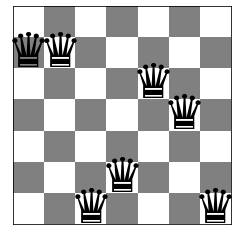

The end board is: [2 4 6 1 3 5 0]
The end conflict is: 0
step: 2795, temp: 2.2689, current conflict: 0
Board with 0 conflicts.


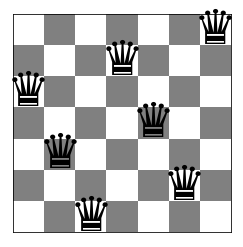

End Simulated Annealing Search


In [8]:
"""
    This algorithm frame is from the textbook and van Laarhoven,
    P.J.M., Aarts, E.H.L. (1987).Simulated annealing. In: 
    Simulated Annealing: Theory and Applications. Mathematics and Its Applications,
    vol 37. Springer, Dordrecht. https://doi.org/10.1007/978-94-015-7744-1_2
"""

from math import e

def show_simulated_annealing_processes(all_boards, all_conflicts, c_list):
    # show the total changed conflict processes
    print("Start Simulated Annealing Search:")
    for i in range(len(all_boards)):
        if i == 0:
            print(f"The start board is: {all_boards[i]}")
            print(f"The start conflict is: {all_conflicts[i]}")
            print(f"step: {i}, temp: {c_list[i]:.4f}, current conflict: {all_conflicts[i]}")
            show_board(all_boards[i])
        elif i == len(all_boards) -1:
            print(f"The end board is: {all_boards[i]}")
            print(f"The end conflict is: {all_conflicts[i]}")
            print(f"step: {i}, temp: {c_list[i]:.4f}, current conflict: {all_conflicts[i]}")
            show_board(all_boards[i])
        else:
            pass
            #print(f"step: {i}, temp: {c_list[i]:.4f}, current conflict: {all_conflicts[i]}")
    print("End Simulated Annealing Search")

def simulated_annealing(size):
    # initialize
    current_board, current_conflict, all_boards, all_conflicts = initialized_board(size)

    # update
    # according to Simulated  Annealing: Theory  and  Applications
    # initialize c:=(board size)^2 (that means expected global minimum for the cost function)
    c = size * size
    c_list = [c]
    while c > 0.000001:
        new_board_conflict = neighbors_conflicts_stochastic_2(current_board)
        delta_C = new_board_conflict[0] - current_conflict
        # if delta C_ij < 0 then accept else
        #   if exp(-delta C_ij/c) > ramdom[0,1) then accept
        if delta_C < 0 or (e ** (-delta_C/c) * 100000) > np.random.randint(100000):
            current_conflict = new_board_conflict[0]
            current_board = new_board_conflict[1]
            all_boards.append(current_board.copy())
            all_conflicts.append(current_conflict)
            c_list.append(c)
        if current_conflict == 0:
            break
        # c_M+1 = f(c_M) (that means c_M+1 = r * c_M)
        # beacause r < 1, set r = 0.999
        # if set r = 0.99, when size = 25, the final conflict number is usually 1
        # if set r = 0.999, when size = 25, the final conflict number is usually 0
        # if set r = 0.9999, although the final conflict number is usually 0, the time cost is too much
        c *= 0.999

    # the final board and conflict (local optimum or optimal solution)
    best_conflict = all_conflicts[-1]
    best_board = all_boards[-1]

    return (best_board, best_conflict, all_boards, all_conflicts, c_list)

if __name__ == '__main__':
    result = simulated_annealing(size=7)
    show_simulated_annealing_processes(result[2], result[3], result[4])

#### Description:

Based on the description of Stochastic Hill Climbing 2 in the textbook, we can tell that the algorithm's logic is:

Step 1. initialize the global minimum for the cost function to size * size, which means c = size * size.

Step 2. Randomly select a board that is different from the current board. (change only one Queen) (this Queen only moves in the column it is in)

Step 3. The difference between the value of the new conflict and the current conflict is delta_C. If delta_C is less than 0, or exp(-delta C_ij/c) > ramdom[0,1), replace the current (conflict, board) with the new (conflict, board). Otherwise, keep the current (conflict, board).

Step 4. If the current conflict value is equal to 0, skip to Step 6. If the current conflict value is not equal to 0, skip to Step 5.

Step 5. If c is greater than 0.000001, skip to Step 2. If c is less than or equal to 0.000001, skip to Step 6.

Step 6. If the conflict value is equal to 0, then it is an optimal solution; If the conflict value is not equal to 0, then it is a local optimum.

                              algorithm name       5*5     10*10     15*15  \
0       Steepest-ascend Hill Climbing Search  0.000650  0.006288  0.024173   
1                 Stochastic Hill Climbing 1  0.000335  0.007401  0.042571   
2                 Stochastic Hill Climbing 2  0.006333  0.017977  0.030575   
3  Hill Climbing Search with Random Restarts  0.000547  0.069293  0.492233   
4                        Simulated Annealing  0.002907  0.123189  0.269445   

      20*20      25*25  
0  0.083744   0.186123  
1  0.128648   0.309276  
2  0.034179   0.056085  
3  5.512085  22.005872  
4  0.295681   0.491586  
                              algorithm name  5*5  10*10  15*15  20*20  25*25
0       Steepest-ascend Hill Climbing Search  0.6    1.7    2.5    2.0    2.6
1                 Stochastic Hill Climbing 1  0.2    1.8    2.1    2.6    2.7
2                 Stochastic Hill Climbing 2  0.9    1.8    1.9    2.5    2.8
3  Hill Climbing Search with Random Restarts  0.0    0.0    0.0    0.

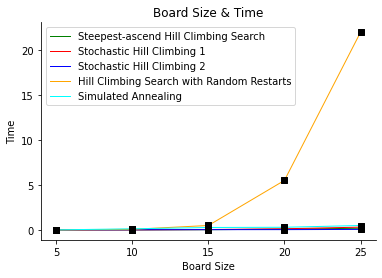

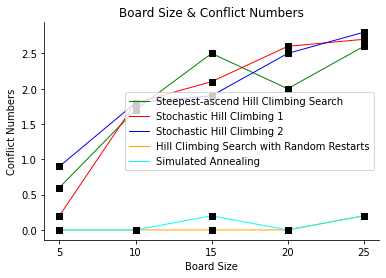

In [9]:
import pandas as pd
import time

def chart(name_list, result):
    name_list = pd.Series(name_list)
    board_1 = pd.Series(result[0])
    board_2 = pd.Series(result[1])
    board_3 = pd.Series(result[2])
    board_4 = pd.Series(result[3])
    board_5 = pd.Series(result[4])
    data = [name_list, board_1, board_2, board_3, board_4, board_5]
    pd.DataFrame(data)

    d = {'algorithm name': pd.Series(name_list),
         '5*5': pd.Series(board_1),
         '10*10': pd.Series(board_2),
         '15*15': pd.Series(board_3),
         '20*20': pd.Series(board_4),
         '25*25': pd.Series(board_5)
         }

    dataframe = pd.DataFrame(d)
    print(dataframe)

def graph(board_size_list, result, graph_name):
    if graph_name == "Time":
        plt.figure("Board Size & Time")
    elif graph_name == "Conflict Numbers":
        plt.figure("Board Size & Conflict Numbers")
    plt.plot(board_size_list, result[0], label="Steepest-ascend Hill Climbing Search", \
             color="green", linewidth=1)
    plt.plot(board_size_list, result[1], label="Stochastic Hill Climbing 1", \
             color="red", linewidth=1)
    plt.plot(board_size_list, result[2], label="Stochastic Hill Climbing 2", \
             color="blue", linewidth=1)
    plt.plot(board_size_list, result[3], label="Hill Climbing Search with Random Restarts", \
             color="orange",linewidth=1)
    plt.plot(board_size_list, result[4], label="Simulated Annealing", \
             color="cyan", linewidth=1)

    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')

    plt.xticks(board_size_list)
    plt.xlabel("Board Size")
    if graph_name == "Time":
        plt.ylabel("Time")
    elif graph_name == "Conflict Numbers":
        plt.ylabel("Conflict Numbers")

    y_data = [result[0], result[1], result[2], result[3], result[4]]
    Y_axis = []
    for i in y_data:
        for j in i:
            Y_axis.append(j)
    x_data = [board_size_list, board_size_list, board_size_list, board_size_list, board_size_list]
    X_axis = []
    for i in x_data:
        for j in i:
            X_axis.append(j)
    plt.scatter(X_axis, Y_axis, marker="s", s=40, facecolor="black", zorder=3)
    if graph_name == "Time":
        plt.title("Board Size & Time")
    elif graph_name == "Conflict Numbers":
        plt.title("Board Size & Conflict Numbers")
    plt.legend()
    plt.show()

def data_loading(ave_result):
    time = [ave_result[0], ave_result[1], ave_result[2], ave_result[3], ave_result[4]]
    conflict = [ave_result[5], ave_result[6], ave_result[7], ave_result[8], ave_result[9]]
    return (time, conflict)

if __name__ == '__main__':
    name_list = [
        "Steepest-ascend Hill Climbing Search",
        "Stochastic Hill Climbing 1",
        "Stochastic Hill Climbing 2",
        "Hill Climbing Search with Random Restarts",
        "Simulated Annealing"
    ]
    board_size_list = [5,10,15,20,25]

    time_list_1 = []
    time_list_2 = []
    time_list_3 = []
    time_list_4 = []
    time_list_5 = []
    time_list_6 = []

    conflict_list_1 = []
    conflict_list_2 = []
    conflict_list_3 = []
    conflict_list_4 = []
    conflict_list_5 = []
    conflict_list_6 = []

    time_steepest_ascend_all = []
    time_stochastic_hill_climbing_1_all = []
    time_stochastic_hill_climbing_2_all = []
    time_hill_climbing_with_random_restarts_all = []
    time_simulated_annealing_all = []

    conflict_steepest_ascend_all = []
    conflict_stochastic_hill_climbing_1_all = []
    conflict_stochastic_hill_climbing_2_all = []
    conflict_hill_climbing_with_random_restarts_all = []
    conflict_simulated_annealing_all = []

    for board_size in board_size_list:
        time_steepest_ascend = []
        time_stochastic_hill_climbing_1 = []
        time_stochastic_hill_climbing_2 = []
        time_hill_climbing_with_random_restarts = []
        time_simulated_annealing = []

        conflict_steepest_ascend = []
        conflict_stochastic_hill_climbing_1 = []
        conflict_stochastic_hill_climbing_2 = []
        conflict_random_restarts = []
        conflict_simulated_annealing = []

        for i in range(10):
            time_start = time.time()
            result = steepest_ascend(size=board_size)
            time_end = time.time() - time_start
            time_steepest_ascend.append(time_end)
            conflict_steepest_ascend.append(result[1])

            time_start = time.time()
            result = stochastic_hill_climbing_1(size=board_size)
            time_end = time.time() - time_start
            time_stochastic_hill_climbing_1.append(time_end)
            conflict_stochastic_hill_climbing_1.append(result[1])

            time_start = time.time()
            result = stochastic_hill_climbing_2(size=board_size, max_search_number=1000)
            time_end = time.time() - time_start
            time_stochastic_hill_climbing_2.append(time_end)
            conflict_stochastic_hill_climbing_2.append(result[1])

            time_start = time.time()
            result = hill_climbing_with_random_restarts(size=board_size, \
                                                        restart_number=100, max_search_number=1000)
            time_end = time.time() - time_start
            time_hill_climbing_with_random_restarts.append(time_end)
            conflict_random_restarts.append(result[1])

            time_start = time.time()
            result = simulated_annealing(size=board_size)
            time_end = time.time() - time_start
            time_simulated_annealing.append(time_end)
            conflict_simulated_annealing.append(result[1])

        t_steepest_ascend_ave = sum(time_steepest_ascend) / len(time_steepest_ascend)
        t_stochastic_hill_climbing_1_ave = \
        sum(time_stochastic_hill_climbing_1) / len(time_stochastic_hill_climbing_1)
        t_stochastic_hill_climbing_2_ave = \
        sum(time_stochastic_hill_climbing_2) / len(time_stochastic_hill_climbing_2)
        t_hill_climbing_with_random_restarts_ave = \
        sum(time_hill_climbing_with_random_restarts) / len(time_hill_climbing_with_random_restarts)
        t_simulated_annealing_ave = sum(time_simulated_annealing) / len(time_simulated_annealing)

        c_steepest_ascend_ave = sum(conflict_steepest_ascend) / len(conflict_steepest_ascend)
        c_stochastic_hill_climbing_1_ave = \
        sum(conflict_stochastic_hill_climbing_1) / len(conflict_stochastic_hill_climbing_1)
        c_stochastic_hill_climbing_2_ave = \
        sum(conflict_stochastic_hill_climbing_2) / len(conflict_stochastic_hill_climbing_2)
        c_hill_climbing_with_random_restarts_ave = \
        sum(conflict_random_restarts) / len(conflict_random_restarts)
        c_simulated_annealing_ave = \
        sum(conflict_simulated_annealing) / len(conflict_simulated_annealing)

        time_steepest_ascend_all.append(t_steepest_ascend_ave)
        time_stochastic_hill_climbing_1_all.append(t_stochastic_hill_climbing_1_ave)
        time_stochastic_hill_climbing_2_all.append(t_stochastic_hill_climbing_2_ave)
        time_hill_climbing_with_random_restarts_all.append(t_hill_climbing_with_random_restarts_ave)
        time_simulated_annealing_all.append(t_simulated_annealing_ave)
        conflict_steepest_ascend_all.append(c_steepest_ascend_ave)
        conflict_stochastic_hill_climbing_1_all.append(c_stochastic_hill_climbing_1_ave)
        conflict_stochastic_hill_climbing_2_all.append(c_stochastic_hill_climbing_2_ave)
        conflict_hill_climbing_with_random_restarts_all.append(c_hill_climbing_with_random_restarts_ave)
        conflict_simulated_annealing_all.append(c_simulated_annealing_ave)

        ave_result = [
            t_steepest_ascend_ave,
            t_stochastic_hill_climbing_1_ave,
            t_stochastic_hill_climbing_2_ave,
            t_hill_climbing_with_random_restarts_ave,
            t_simulated_annealing_ave,
            c_steepest_ascend_ave,
            c_stochastic_hill_climbing_1_ave,
            c_stochastic_hill_climbing_2_ave,
            c_hill_climbing_with_random_restarts_ave,
            c_simulated_annealing_ave
        ]
        loading_result = data_loading(ave_result)

        if board_size == 5:
            time_list_1 = loading_result[0]
            conflict_list_1 = loading_result[1]
        elif board_size == 10:
            time_list_2 = loading_result[0]
            conflict_list_2 = loading_result[1]
        elif board_size == 15:
            time_list_3 = loading_result[0]
            conflict_list_3 = loading_result[1]
        elif board_size == 20:
            time_list_4 = loading_result[0]
            conflict_list_4 = loading_result[1]
        elif board_size == 25:
            time_list_5 = loading_result[0]
            conflict_list_5 = loading_result[1]

    result_1 = [time_list_1, time_list_2, time_list_3, time_list_4, time_list_5, time_list_6]
    result_2 = [
        conflict_list_1,
        conflict_list_2,
        conflict_list_3,
        conflict_list_4,
        conflict_list_5,
        conflict_list_6
    ]
    result_3 = [
        time_steepest_ascend_all,
        time_stochastic_hill_climbing_1_all,
        time_stochastic_hill_climbing_2_all,
        time_hill_climbing_with_random_restarts_all,
        time_simulated_annealing_all
    ]
    result_4 = [
        conflict_steepest_ascend_all,
        conflict_stochastic_hill_climbing_1_all,
        conflict_stochastic_hill_climbing_2_all,
        conflict_hill_climbing_with_random_restarts_all,
        conflict_simulated_annealing_all
    ]

    chart(name_list, result_1)
    chart(name_list, result_2)
    graph(board_size_list, result_3, "Time")
    graph(board_size_list, result_4, "Conflict Numbers")

#### Description:

My choice of annealing schedule is that c = size * size, r = 0.999. If set r = 0.99, when size = 25, the final conflict number is usually 1. If set r = 0.9999, although the final conflict number is usually 0, the time cost is too much. Besides, according to the chart and graph, it is easy to see that Simulated Annealing Algorithm is the best choice when the board size is relatively large.

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

#### Description:

Based on the description of Genetic Algorithm in the textbook, we can tell that the algorithm's logic is:

Step 1. Randomly generate n boards and their corresponding conflicts, and put them into the total generation list.

Step 2. Calculate the smallest conflict and its corresponding board in the total generation list and store them in best_conflict and best_board.

Step 3. Select a% of the data from the total generation list and put them into the selection generation list. (The programmer sets the value of a)

Step 4. Select two random data from the selection generation list, i.e., data A and data B. Combine A[0:x] and B[x:-1] to generate C, and B[0:x] and A[x:-1] to generate D (x must be generated each time randomly). Then add C and D to the crossover generation list.

Step 5. Loop through step 4 (a%*n/2) times.

Step 6. Add the crossover generation list to the selection generation list.

Step 7. Select a random board from the selection generation list and change the value of its random column queen to another random value.

Step 8. Loop through step 7 (a%*n*2*b%) times. (The programmer sets the value of b)

Step 9. Copy the selection generation list to the total generation list and arrange the total generation list in the order of the conflict values from smallest to largest. If the minimum value of conflict in the total generation list is less than the current best_conflict, skip to Step 10. Otherwise, skip to Step 12.

Step 10. Replace the current best_conflict with the minimum value of conflict in the total generation list, and replace the current best_board with the board corresponding to the minimum value of conflict in the total generation list.

Step 11. The maximum number of iterations is self-subtracting by 1. If the maximum number of iterations is greater than 0, skip to Step 3. Otherwise, skip to Step 12.

Step 12. If the conflict value is equal to 0, then it is an optimal solution; If the conflict value is not equal to 0, then it is a local optimum.

In [13]:
def genetic_algorithm(size, total_number, max_iteration, selection_propotion, mutation_proportion):
    # initialize n boards
    total_generation = []
    # all board and conflicts in total processes
    all_boards = []
    all_conflicts = []
    for i in range(total_number):
        board = random_board(size)
        conflict = conflicts(board)
        total_generation.append((conflict, board.copy()))
    total_generation.sort(key=itemgetter(0))
    best_conflict = total_generation[0][0]
    best_board = total_generation[0][1]
    # add initialized best_board and best_conflict
    all_boards.append(best_board.copy())
    all_conflicts.append(best_conflict)

    # update
    while max_iteration:
        # select a% of the data from the total generation list
        selection_generation = \
        total_generation[0:int(total_number * selection_propotion)].copy()
        current_selection_population = selection_generation.copy()

        # corssover
        crossover_generation = []
        cycle_number = int(len(selection_generation)/2)
        while cycle_number:
            past_1 = \
            current_selection_population.pop(np.random.randint(0, len(current_selection_population)))
            past_2 = \
            current_selection_population.pop(np.random.randint(0, len(current_selection_population)))
            crossover_location = np.random.randint(1, size-1)
            new_1 = \
            np.concatenate((past_1[1][0:crossover_location], past_2[1][crossover_location:size]))
            new_2 = \
            np.concatenate((past_2[1][0:crossover_location], past_1[1][crossover_location:size]))
            crossover_generation.append((conflicts(new_1), new_1.copy()))
            crossover_generation.append((conflicts(new_2), new_2.copy()))
            cycle_number -= 1

        # add the crossover generation list to the selection generation list
        selection_generation.extend(crossover_generation)

        # mutation
        mutation_number = int(len(selection_generation) * mutation_proportion)
        while mutation_number:
            mutation_location = np.random.randint(0, len(selection_generation))
            mutation_board = selection_generation[mutation_location][1]
            i = np.random.randint(0, size)
            j = np.random.randint(0, size)
            mutation_board[i] = j
            selection_generation[mutation_location] = \
            (conflicts(mutation_board), mutation_board.copy())
            mutation_number -= 1

        # copy the selection generation list to the total generation list
        total_generation= selection_generation.copy()
        total_generation.sort(key=itemgetter(0))
        if (total_generation[0][0] < best_conflict):
            best_conflict = total_generation[0][0]
            best_board = total_generation[0][1].copy()
            all_conflicts.append(best_conflict)
            all_boards.append(best_board.copy())

        if (best_conflict == 0):
            break
        max_iteration -= 1

    return (best_conflict, best_board, all_boards, all_conflicts)

if __name__ == '__main__':
    conflict = 100000
    for i_1 in range(15,21):
        for i_2 in range(1000,1501,100):
            for i_3 in range(4,8):
                for i_4 in range(1,6):
                    temp_conflict_list = []
                    for j in range(5):
                        result = genetic_algorithm(size=10, \
                                                   total_number=i_1, \
                                                   max_iteration=i_2, \
                                                   selection_propotion=(i_3 / 10), \
                                                   mutation_proportion=(i_4 / 10))
                        temp_conflict = result[0]
                        temp_conflict_list.append(temp_conflict)
                    current_conflict = sum(temp_conflict_list)/len(temp_conflict_list)
                    if current_conflict < conflict or current_conflict == 0 or current_conflict == 0.1:
                        conflict = current_conflict
                        print(f"current_conflict = {current_conflict}, total_number = {i_1},\
                        max_iteration = {i_2}, selection_propotion = {i_3/10}, mutation_proportion = {i_4/10}")

current_conflict = 0.6, total_number = 15,                        max_iteration = 1000, selection_propotion = 0.4, mutation_proportion = 0.1
current_conflict = 0.2, total_number = 15,                        max_iteration = 1000, selection_propotion = 0.4, mutation_proportion = 0.2
current_conflict = 0.0, total_number = 15,                        max_iteration = 1000, selection_propotion = 0.4, mutation_proportion = 0.5
current_conflict = 0.0, total_number = 15,                        max_iteration = 1000, selection_propotion = 0.7, mutation_proportion = 0.3
current_conflict = 0.0, total_number = 15,                        max_iteration = 1100, selection_propotion = 0.5, mutation_proportion = 0.4
current_conflict = 0.0, total_number = 15,                        max_iteration = 1300, selection_propotion = 0.4, mutation_proportion = 0.4
current_conflict = 0.0, total_number = 15,                        max_iteration = 1300, selection_propotion = 0.7, mutation_proportion = 0.5
current_confl

#### Description:

Based on the printed results, I think both (total_number=17, max_iteration=1100, selection_propotion=0.7, mutation_proportion=0.2) and (total_number=18, max_iteration=1000, selection_propotion=0.7, mutation_proportion=0.2) are a better choice.